# Lab Work 1

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier

In [17]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None, names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [33]:
X = iris.iloc[:, :-1].values
Y = iris.iloc[:, 4].values
model = DecisionTreeClassifier()
model.fit(X, Y)

DecisionTreeClassifier()

In [34]:
predict = model.predict(X)

In [38]:
predict[predict == 'Iris-setosa'] = 0
predict[predict == 'Iris-versicolor'] = 1
predict[predict == 'Iris-virginica'] = 2

In [ ]:
sklearn.from

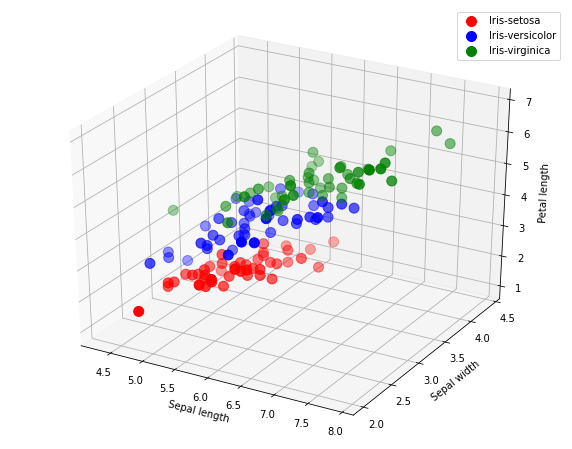

In [39]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[predict == 0, 0], X[predict == 0, 1], X[predict == 0, 2], s = 100, c = 'red', label = 'Iris-setosa')
ax.scatter(X[predict == 1, 0], X[predict == 1, 1], X[predict == 1, 2], s = 100, c = 'blue', label = 'Iris-versicolor')
ax.scatter(X[predict == 2, 0], X[predict == 2, 1], X[predict == 2, 2], s = 100, c = 'green', label = 'Iris-virginica')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.legend()
plt.show()

# Lab Work 2

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f648ae6526c5d85d547443a1714ef1d3279a123936b866619773c37d1c1a0a64
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
from skfuzzy.control.controlsystem import Antecedent
exam_preparation = ctrl.Antecedent(np.arange(0, 11, 1), 'exam_preparation')
grades = ctrl.Antecedent(np.arange(0, 11, 1), 'grades')

In [4]:
reward = ctrl.Consequent(np.arange(0, 26, 1), 'reward')

In [5]:
exam_preparation['poor'] = fuzz.trimf(exam_preparation.universe, [0, 0, 5])
exam_preparation['good'] = fuzz.trimf(exam_preparation.universe, [0, 5, 10])
exam_preparation['excellent'] = fuzz.trimf(exam_preparation.universe, [5, 10, 10])

In [6]:
grades['poor'] = fuzz.trimf(grades.universe, [0, 0, 5])
grades['good'] = fuzz.trimf(grades.universe, [0, 5, 10])
grades['excellent'] = fuzz.trimf(grades.universe, [5, 10, 10])

In [7]:
reward['low'] = fuzz.trimf(reward.universe, [0, 0, 13])
reward['medium'] = fuzz.trimf(reward.universe, [0, 13, 25])
reward['high'] = fuzz.trimf(reward.universe, [13, 25, 25])

In [8]:
rule1 = ctrl.Rule(exam_preparation['poor'] | grades['poor'], reward['low'])
rule2 = ctrl.Rule(grades['good'], reward['medium'])
rule3 = ctrl.Rule(exam_preparation['excellent'] | grades['excellent'], reward['high'])
rule4 = ctrl.Rule(exam_preparation['good'] | grades['good'], reward['medium'])

In [9]:
reward_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
reward_amount = ctrl.ControlSystemSimulation(reward_ctrl)

In [10]:
reward_amount.input['exam_preparation'] = 9.2
reward_amount.input['grades'] = 8.8

In [11]:
reward_amount.compute()

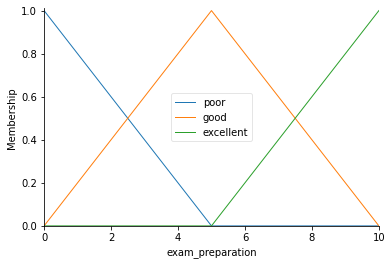

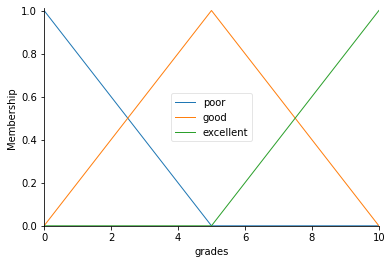

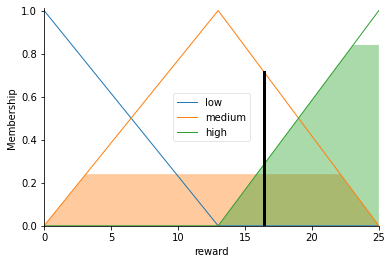

In [13]:
exam_preparation.view()
grades.view()
reward.view(sim = reward_amount)